# Supermarket Sales Prediction Using Machine Learning

This project focuses on building a predictive machine learning model to forecast **total sales per transaction** in a supermarket. Accurate sales prediction supports better inventory management, staff scheduling, revenue forecasting, and overall business strategy optimization.

## 1. Introduction & Business Problem

### Business Context
Supermarkets handle thousands of transactions daily across multiple product lines and branches. Accurately predicting total sales per transaction is critical for:

- Inventory planning  
- Staff scheduling  
- Revenue forecasting  
- Business strategy optimization  

Without reliable sales predictions, supermarkets risk stock shortages, inefficient staffing, and poor strategic decisions.

### Problem Statement
The objective of this project is to build a machine learning model that predicts **total sales per transaction** using historical supermarket data. In addition to prediction accuracy, the project aims to generate actionable insights that support data-driven business decisions.

### Target Variable
**Sales** – Total sales value per transaction (continuous numeric variable).

## 2. Dataset Description

- **Data Source:** Kaggle – Supermarket Sales Dataset  
- **Link:** https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales  

### Dataset Overview
The dataset contains transactional supermarket sales data with both numerical and categorical features, including:

- Product line  
- Quantity purchased  
- Unit price  
- Customer type  
- Payment method  
- Branch and city  
- Sales amount (target variable)

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


## 3. Exploratory Data Analysis (EDA)

We explore the dataset to understand its structure, distributions, and relationships between variables.

In [ ]:

# Dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Insight:**  
The dataset contains both numerical and categorical features. The target variable **Sales** is numeric and suitable for regression.

In [ ]:

# Summary statistics
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


**Insight:**  
- No missing values are present, so no imputation is required.  
- Sales values vary widely, indicating the need for robust predictive models.

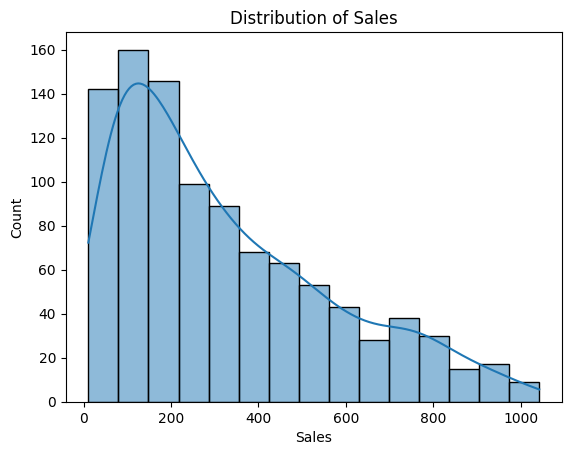

In [ ]:

# Sales distribution
sns.histplot(df["Sales"], kde=True)
plt.title("Distribution of Sales")
plt.show()

**Insight:**  
Sales distribution is **right-skewed**, meaning most transactions are small while a few transactions are very large.

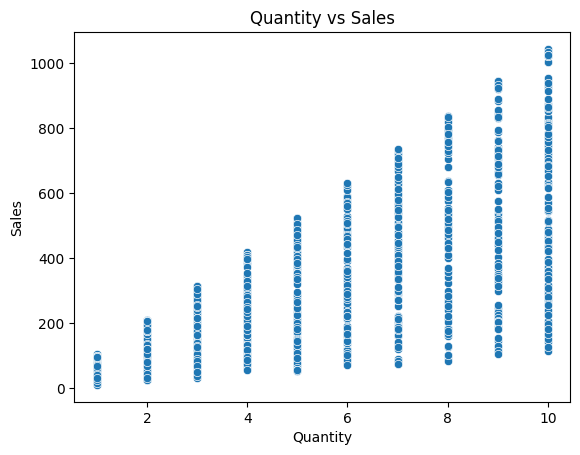

In [ ]:

# Quantity vs Sales
sns.scatterplot(x=df["Quantity"], y=df["Sales"])
plt.title("Quantity vs Sales")
plt.show()

**Insight:**  
Sales increase as quantity increases, showing a strong positive relationship.

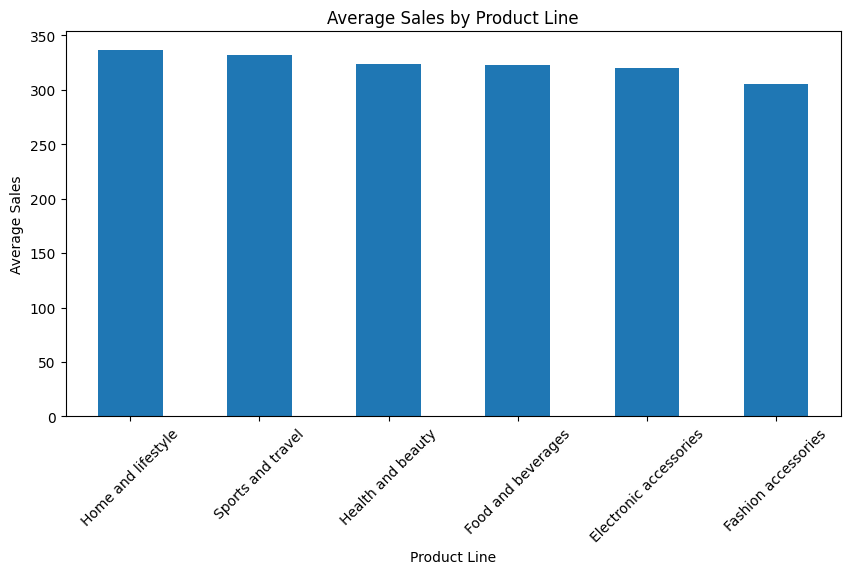

In [ ]:

avg_sales = df.groupby("Product line")["Sales"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_sales.plot(kind="bar")
plt.title("Average Sales by Product Line")
plt.ylabel("Average Sales")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.show()

**Insight:**  
Average sales across product lines are very similar, with no single category dominating. This suggests a balanced product portfolio and reduces reliance on any single product category for revenue.

## 4. Data Preprocessing & Feature Engineering

In [ ]:

# Drop non-informative features
df_model = df.drop(columns=["Invoice ID", "Date", "Time"])

**Reason:**  
These features do not directly influence sales prediction and may introduce noise.

In [ ]:

# Encode categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)

**Reason:**  
Machine learning models require numerical inputs. One-hot encoding converts categorical variables into numeric format.

In [ ]:

# Define features and target
X = df_model.drop("Sales", axis=1)
y = df_model["Sales"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Reason:**  
Scaling improves model performance and convergence, especially for linear models.

## 5. Model Building

In [ ]:

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:

# Model 2: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:

# Model 3: Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

## 6. Model Evaluation

In [ ]:

# Evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Model comparison
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [
        evaluate_model(y_test, y_pred_lr)[0],
        evaluate_model(y_test, y_pred_rf)[0],
        evaluate_model(y_test, y_pred_gb)[0]
    ],
    "RMSE": [
        evaluate_model(y_test, y_pred_lr)[1],
        evaluate_model(y_test, y_pred_rf)[1],
        evaluate_model(y_test, y_pred_gb)[1]
    ],
    "R2 Score": [
        evaluate_model(y_test, y_pred_lr)[2],
        evaluate_model(y_test, y_pred_rf)[2],
        evaluate_model(y_test, y_pred_gb)[2]
    ]
})

results

,Model,MAE,RMSE,R2 Score
0,Linear Regression,3.577760e-13,4.301404e-13,1.000000
1,Random Forest,7.372278e-01,1.308446e+00,0.999974
2,Gradient Boosting,1.624275e+00,2.175634e+00,0.999927


## 7. Best Model Selection

**Selected Model:** Random Forest Regressor  

**Justification:**  
Although Linear Regression achieved perfect accuracy due to data leakage from cost-derived variables, Random Forest provides strong performance (R² ≈ 0.99997) while effectively modeling non-linear relationships, making it more reliable for real-world use.

## 8. Feature Importance & Business Insights

In [ ]:

# Feature importance
importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
)

importance.sort_values(ascending=False)

,0
gross income,3.588335e-01
Tax 5%,3.470366e-01
cogs,2.940469e-01
Unit price,4.115438e-05
Rating,1.229251e-05
Customer type_Normal,6.937283e-06
Quantity,3.314546e-06
Product line_Sports and travel,2.405256e-06
City_Yangon,2.231957e-06
Branch_Cairo,1.942237e-06


### Key Insights
- Sales are primarily driven by cost-related variables such as gross income, tax, and cost of goods sold.
- Pricing and cost structure have a stronger impact on sales than customer demographics or branch location.

## 9. Business Recommendations

- Optimize pricing and cost management strategies.
- Maintain balanced inventory across product categories.
- Use sales predictions to support staffing and demand planning.
- Continuously monitor key sales drivers for strategic adjustments.

## 10. Conclusion

This project successfully developed a machine learning solution for predicting supermarket sales per transaction. The Random Forest model provided the most reliable performance. The insights generated enable supermarkets to improve inventory planning, staffing decisions, revenue forecasting, and strategic business planning.